In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


Based on [my FICO](https://www.myfico.com/credit-education/credit-scores/whats-not-in-your-credit-score) these information are not considered in credit score calculation:
- Race, color, religion, national origin, sex and marital status
- Age
- Salary, occupation, title, employer, date employed or employment history
- Address
- Any interest rate being charged on a particular credit card or other account
- Any items reported as child/family support obligations
- Certain types of inquiries (requests for your credit report)
- Any information not found in your credit report
- Non-bankruptcy public records
- Any information that is not proven to be predictive of future credit performance
- Whether or not you are participating in a credit counseling of any kind

In [3]:
# Drop irrelevant columns
df.drop(columns=['ID', 'Customer_ID', 'Name', 'Age', 'SSN', 'Occupation',
                 'Annual_Income', 'Monthly_Inhand_Salary','Interest_Rate',
                 'Type_of_Loan', 'Num_Credit_Inquiries'], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Num_Bank_Accounts         100000 non-null  float64
 2   Num_Credit_Card           100000 non-null  float64
 3   Num_of_Loan               100000 non-null  float64
 4   Delay_from_due_date       100000 non-null  float64
 5   Num_of_Delayed_Payment    100000 non-null  float64
 6   Changed_Credit_Limit      100000 non-null  float64
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  float64
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Credit_History_Age        100000 non-null  float64
 11  Payment_of_Min_Amount     100000 non-null  object 
 12  Total_EMI_per_month       100000 non-null  float64
 13  Amount_invested_monthly   100000 non-null  fl

In [5]:
df.describe()

,Month,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,5.368820,5.533570,3.532880,21.08141,13.313120,10.470323,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,2.291299,2.593314,2.067098,2.446356,14.80456,6.237166,6.609481,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.500000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,2.750000,3.000000,4.000000,2.000000,10.00000,9.000000,5.380000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,4.500000,5.000000,5.000000,3.000000,18.00000,14.000000,9.400000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,6.250000,7.000000,7.000000,5.000000,28.00000,18.000000,14.850000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,8.000000,11.000000,11.000000,9.000000,62.00000,25.000000,29.980000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [6]:
df.isnull().sum()

Month                       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

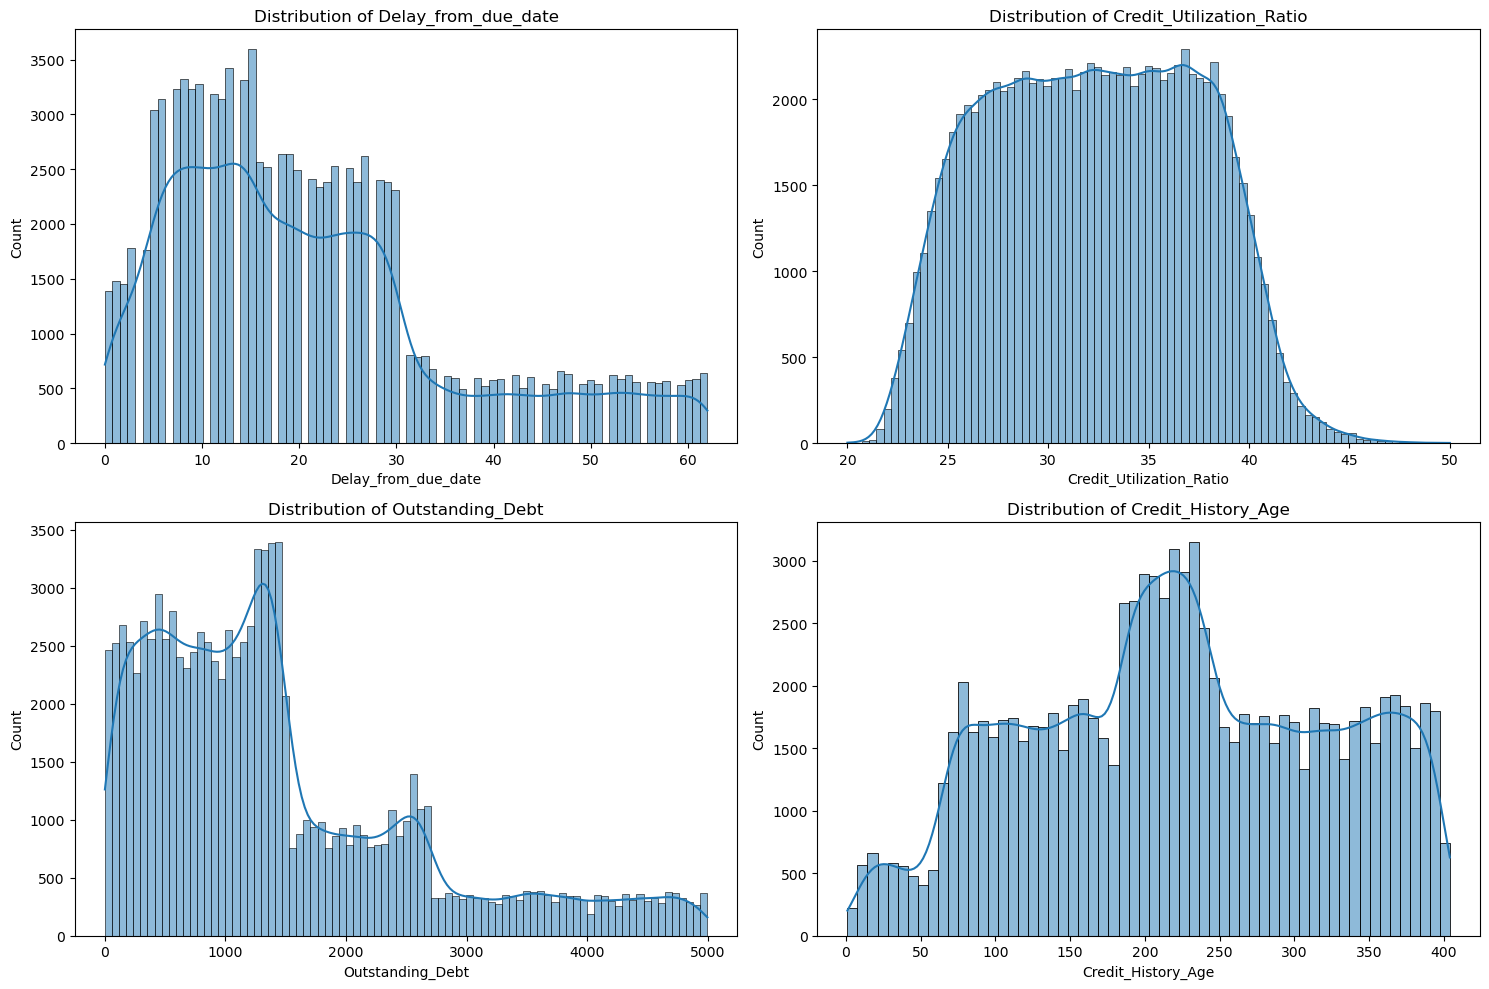

In [7]:
# List of continuous variables
continuous_vars = ['Delay_from_due_date', 'Credit_Utilization_Ratio', 
                   'Outstanding_Debt', 'Credit_History_Age']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

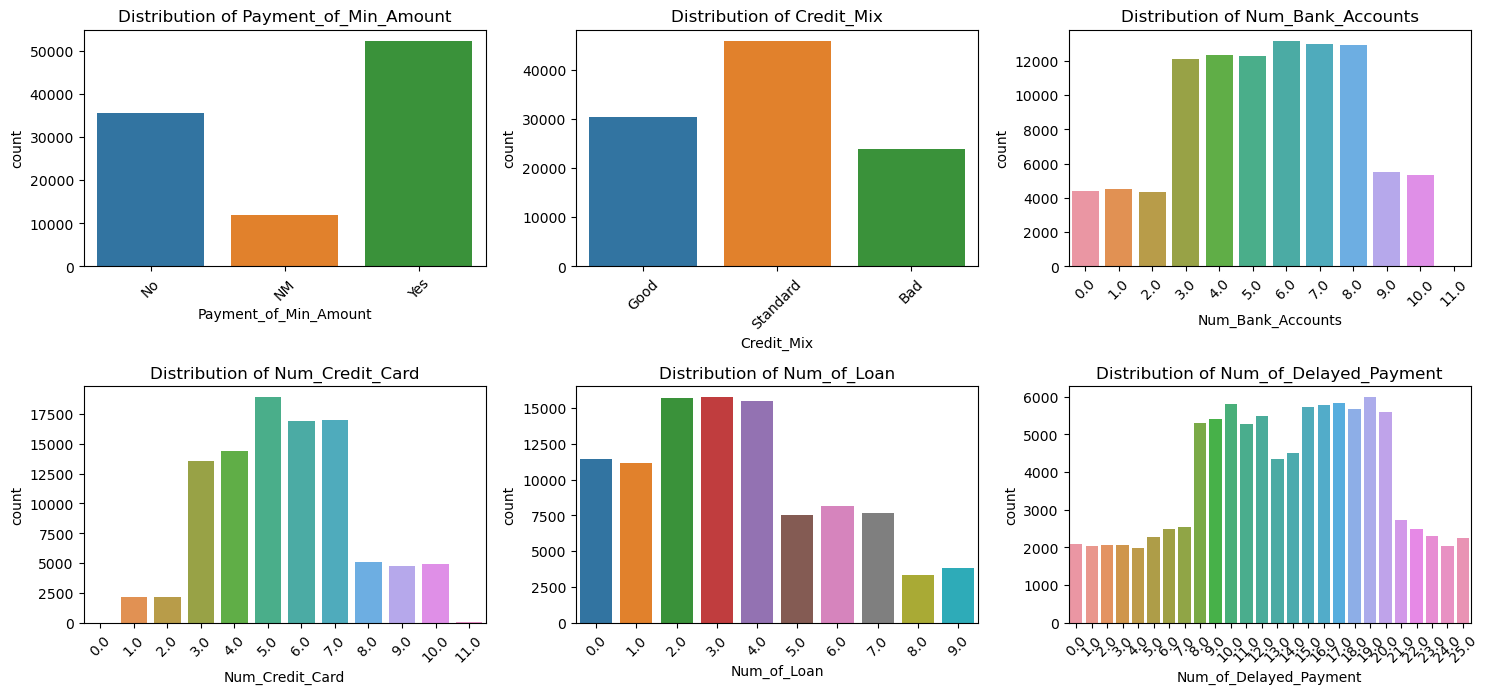

In [8]:
# List of categorical variables
categorical_vars = ['Payment_of_Min_Amount', 'Credit_Mix', 'Num_Bank_Accounts',
                    'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment']

# Plot bar plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Credit_Score                1.000000
Credit_Mix                  0.498673
Credit_History_Age          0.388788
Monthly_Balance             0.197728
Amount_invested_monthly     0.172225
Payment_Behaviour           0.118634
Credit_Utilization_Ratio    0.045793
Total_EMI_per_month         0.016572
Month                       0.016291
Changed_Credit_Limit       -0.170649
Num_of_Loan                -0.358355
Num_of_Delayed_Payment     -0.372978
Payment_of_Min_Amount      -0.384088
Outstanding_Debt           -0.386525
Num_Bank_Accounts          -0.388165
Num_Credit_Card            -0.404435
Delay_from_due_date        -0.431446
Name: Credit_Score, dtype: float64


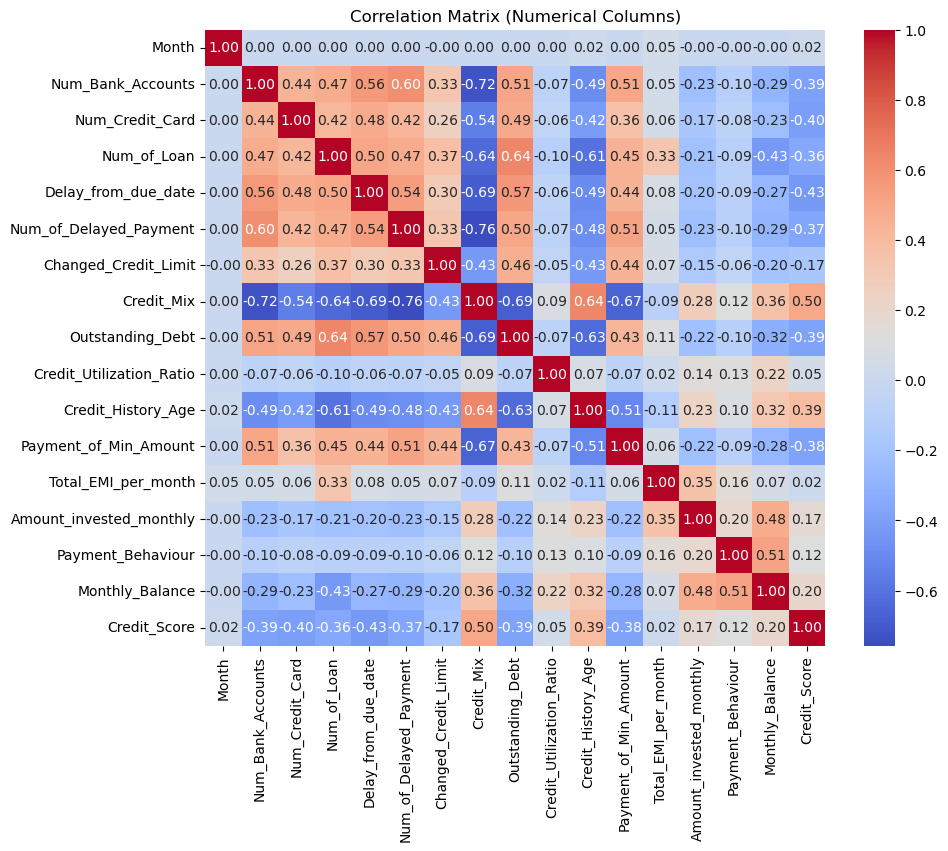

In [9]:
df['Credit_Score'] = df['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})
df['Credit_Mix'] = df['Credit_Mix'].map({'Bad': 0, 'Standard': 1, 'Good': 2})
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'No': 0, 'NM': 0, 'Yes': 1})

payment_behaviour_map = {
    'Low_spent_Small_value_payments': 0,
    'Low_spent_Medium_value_payments': 1,
    'Low_spent_Large_value_payments': 2,
    'High_spent_Small_value_payments': 3,
    'High_spent_Medium_value_payments': 4,
    'High_spent_Large_value_payments': 5
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].map(payment_behaviour_map)

# Correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
credit_score_correlation = correlation_matrix["Credit_Score"].sort_values(ascending=False)

print(credit_score_correlation)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

Based on [FICO Scores](https://www.myfico.com/credit-education/whats-in-your-credit-score)
the categories are considered when calculating credit score are:\
Since our dataset don't have information about new credit I change the proportion
1. Payment history (40%):
   - `Num_of_Delayed_Payment`
   - `Payment_of_Min_Amount`
   - `Delay_from_due_date`
2. Amounts owed (35%):
   - `Outstanding_Debt`
   - `Credit_Utilization_Ratio`
   - `Monthly_Balance`
3. Length of credit history (15%):
   - `Credit_History_Age`
4. Credit mix (10%):
   - `Num_Bank_Accounts`
   - `Num_Credit_Card`
   - `Num_of_Loan`

In [10]:
# Drop non critical columns that -0.3 < corr < 0.3
df.drop(columns=['Amount_invested_monthly', 'Payment_Behaviour',
                 'Total_EMI_per_month', 'Month', 'Changed_Credit_Limit'], inplace=True)

In [11]:
# Calculate weighted scores
df['Payment_History'] = (
    0.4 * (1 - (df['Num_of_Delayed_Payment'] / df['Num_of_Delayed_Payment'].max())) +
    0.4 * df['Payment_of_Min_Amount'] +
    0.4 * (1 - (df['Delay_from_due_date'] / df['Delay_from_due_date'].max()))
)

df['Amounts_Owed'] = (
    0.35 * (1 - (df['Outstanding_Debt'] / df['Outstanding_Debt'].max())) +
    0.35 * (1 - df['Credit_Utilization_Ratio']) +
    0.35 * (df['Monthly_Balance'] / df['Monthly_Balance'].max())
)

df['Length_Credit_History'] = 0.15 * (df['Credit_History_Age'] / df['Credit_History_Age'].max())

df['Credit_Mix_Score'] = (
    0.1 * (df['Num_Bank_Accounts'] / df['Num_Bank_Accounts'].max()) +
    0.1 * (df['Num_Credit_Card'] / df['Num_Credit_Card'].max()) +
    0.1 * (df['Num_of_Loan'] / df['Num_of_Loan'].max())
)

# Combine all scores
df['Credit_Score_Raw'] = (
    df['Payment_History'] +
    df['Amounts_Owed'] +
    df['Length_Credit_History'] +
    df['Credit_Mix_Score']
)

# Normalize credit score to a range (e.g., 300-850)
min_score = 300
max_score = 850

# Normalization step
df['Credit_Score_Val'] = min_score + (df['Credit_Score_Raw'] - df['Credit_Score_Raw'].min()) / (df['Credit_Score_Raw'].max() - df['Credit_Score_Raw'].min()) * (max_score - min_score)

df[['Payment_History', 'Amounts_Owed', 'Length_Credit_History', 'Credit_Mix_Score', 'Credit_Score', 'Credit_Score_Val']]

,Payment_History,Amounts_Owed,Length_Credit_History,Credit_Mix_Score,Credit_Score,Credit_Score_Val
0,0.668645,-8.652256,0.098391,0.108081,2,712.536648
1,0.716645,-10.453313,0.098762,0.108081,2,622.880737
2,0.668645,-9.272080,0.099134,0.108081,2,680.868523
3,0.703742,-10.272914,0.099505,0.108081,2,631.486691
4,0.697290,-7.934839,0.099876,0.108081,2,750.776281
...,...,...,...,...,...,...
99995,0.539613,-11.325570,0.140347,0.113131,0,571.591506
99996,0.571871,-13.386328,0.140718,0.113131,0,467.845698
99997,0.529806,-13.621831,0.141089,0.113131,0,453.666159
99998,0.574968,-11.014200,0.141460,0.113131,1,589.384654


Looks correct! In our new credit score value, scores range from 300 to 850. Individuals classified as class 2 (Good) have higher scores compared to those in class 1 (Standard), and individuals in class 1 will have higher scores than those in class 0 (Poor).

In [12]:
# Drop columns for modelling
df.drop(columns=['Payment_History', 'Amounts_Owed', 'Length_Credit_History',
                 'Credit_Mix_Score', 'Credit_Mix', 'Credit_Score_Raw', 'Credit_Score'], inplace=True)
df

,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Monthly_Balance,Credit_Score_Val
0,3.0,4.0,4.0,3.0,7.0,809.98,26.822620,265.0,0,312.494089,712.536648
1,3.0,4.0,4.0,3.0,4.0,809.98,31.944960,266.0,0,284.629162,622.880737
2,3.0,4.0,4.0,3.0,7.0,809.98,28.609352,267.0,0,331.209863,680.868523
3,3.0,4.0,4.0,5.0,4.0,809.98,31.377862,268.0,0,223.451310,631.486691
4,3.0,4.0,4.0,6.0,4.0,809.98,24.797347,269.0,0,341.489231,750.776281
...,...,...,...,...,...,...,...,...,...,...,...
99995,4.0,6.0,2.0,23.0,7.0,502.38,34.663572,378.0,0,479.866228,571.591506
99996,4.0,6.0,2.0,18.0,7.0,502.38,40.565631,379.0,0,496.651610,467.845698
99997,4.0,6.0,2.0,27.0,6.0,502.38,41.255522,380.0,0,516.809083,453.666159
99998,4.0,6.0,2.0,20.0,6.0,502.38,33.638208,381.0,0,319.164979,589.384654


In [13]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['Credit_Score_Val'])
y = df['Credit_Score_Val']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(eval_metric='mlogloss', use_label_encoder=False),
    'Gradient Boosting': GradientBoostingRegressor()
}

mse_scores = {}
r2_scores = {}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores[name] = mse
    r2_scores[name] = r2

    print(f"\n{name} Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print("="*50)

Training Linear Regression...

Linear Regression Performance:
Mean Squared Error: 0.0000
R-squared: 1.0000
Training Random Forest...

Random Forest Performance:
Mean Squared Error: 5.1710
R-squared: 0.9994
Training XGBoost...

XGBoost Performance:
Mean Squared Error: 4.8889
R-squared: 0.9994
Training Gradient Boosting...

Gradient Boosting Performance:
Mean Squared Error: 6.4955
R-squared: 0.9992


In [15]:
# Find the best model
best_mse_model = min(mse_scores, key=mse_scores.get)
best_r2_model = max(r2_scores, key=r2_scores.get)

print(f"Best Model based on MSE: {best_mse_model}")
print(f"Best Model based on R-squared: {best_r2_model}")

Best Model based on MSE: Linear Regression
Best Model based on R-squared: Linear Regression


In [16]:
import pickle
best_model = models[best_r2_model]

with open('credit_score_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)